GoogLeNet发表于2014年，其名字是为了致敬Lenet，也叫inceptionv1，是inception系列的第一个版本。其历史贡献是在一层网络结构中使用多个不同的卷积核，用于提取不同尺寸的特征，同时将网络的实时性考虑在其中，通过一种稀疏连接的方式实现加宽网络（增加特征图的channel）的效果。

动机：提升网络效果最直接的方式是加深或加宽，然而一味地对网络进行统一地（uniformly）加深或加宽，一方面可能造成过拟合，尤其是数据量较少的时候，另一方面会增加计算量，呈平方级增加（如各层特征图深度增加2倍，则总体的计算量增加4倍）。而一旦计算出来的特征图大部分为0或接近于0，那么增加的计算量就被白白浪费了。<br/>
现在的计算设备对于不规则稀疏矩阵是非常低效的，而对于密集矩阵运算效率却很高，因此作者想通过一种稀疏连接（多个不同尺寸的卷积核连接输入与输出特征图）的方式构造密集矩阵，从而让计算设备对于密集矩阵的计算发挥作用，提升网络的实时性。

naive的inception模块如下图所示，通过1x1，3x3，5x5卷积核与max pooling构造inception模块。
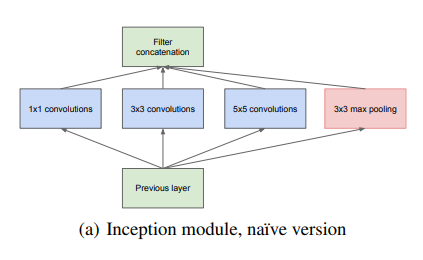

其中的3x3与5x5的卷积核计算量太大，因此作者优化了网络结构，如下图所示。其中1x1卷积参考NIN，NIN中是为了提升卷积操作的非线性，这里主要用于降维，减少计算量。
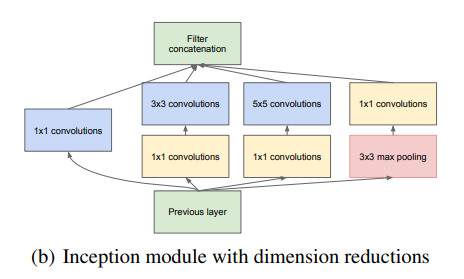

将inception模块进行堆叠，即可得到GoogLenet的网络结构：
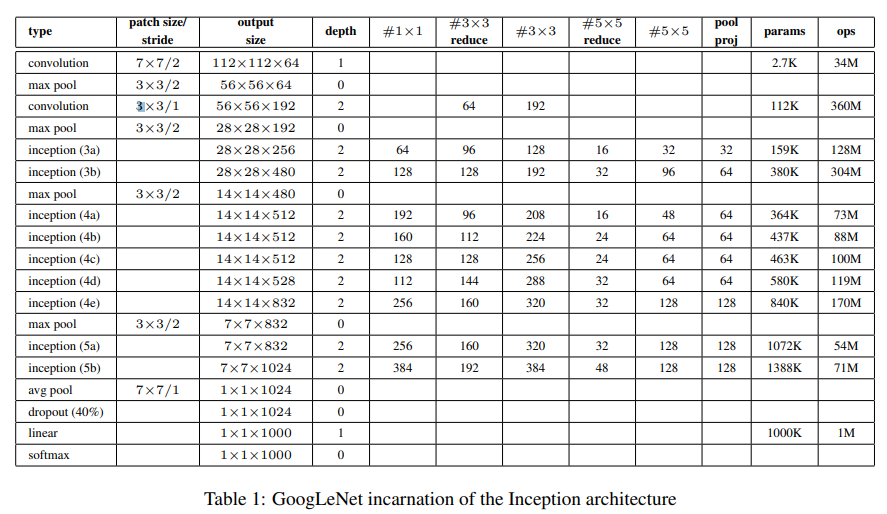

实现细节：<br/>
1)auxiliary classifier。训练深层网络会遇到梯度消失问题，为了应对这个问题，作者在网络中间加入两个额外的分类子网络，如下图所示。在训练时产生loss，最终的loss为最后的loss与两个额外的分类子网络的loss之和，两个子网络在所在位置向前传播梯度，使前面的层能够更好地更新，缓解了梯度消失问题。
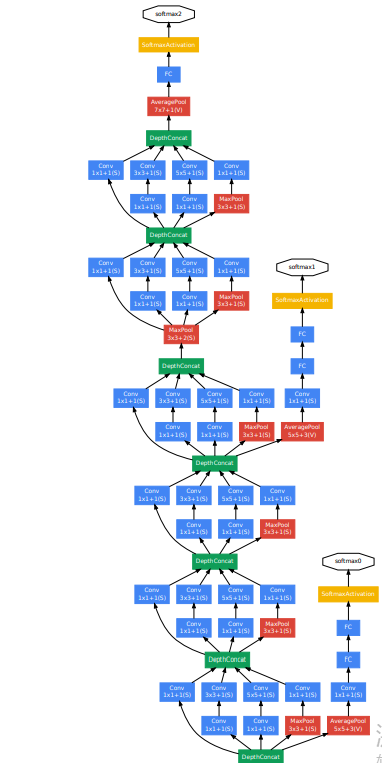
2)在全局池化层后接一个全连接层，是为了在类别数不同时，便于调整。

测试细节：<br/>
1)ensemble策略。采用7个GoogLenet，每个网络只是数据集采样方式不一样（随机打乱然后采样，每次取训练数据的顺序不同）<br/>
2)Multi-crop evaluation。144 crops。<br/>
3)将ensemble的7个模型与144的crops的输出logits取平均。